## introduction to opencv with python


based on 
https://www.geeksforgeeks.org/introduction-to-opencv/




## Loading images

Let’s start with the simple task of reading an image using OpenCV.

In [33]:
# Importing the OpenCV, numpy and matplotlib packages
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt # w use plt in rather than pyplot 

# Reading the image using imread() function
img = cv.imread('cofee.jpg')
  
# Extracting the height and width of an image
h, w = img.shape[:2]
# Displaying the height and width
print("h = {},  Width = {}".format(h, w))


h = 159,  Width = 318


## Show an image in the notebook using matplotlib imshow


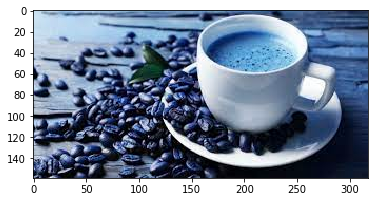

In [34]:
plt.imshow(img)
plt.show()

## OpenCv stores images in BGR order
opencv stores the image in BGR order, and matplotlib expectes them in RGB

to fix this we need to swap the channales when we need to show the image.


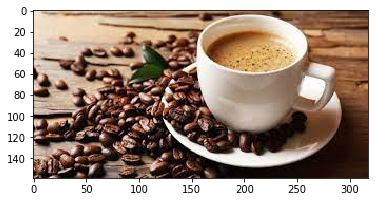

In [35]:
# as opencv loads in BGR format by default, we want to show it in RGB.
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))


## we can define a function to show opencv images in notbooks


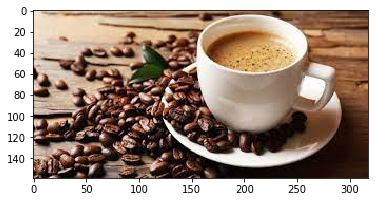

In [36]:

def cv_show(image):
    plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))

cv_show(img)
# you can put this in a function


## What is the type of the variable img ?



In [37]:
print(type(img))


<class 'numpy.ndarray'>


## what is  img.shape ?

In [38]:
print(img.shape)

(159, 318, 3)


## python slicing is used to extract the w and h

* sample is a property of the numpy array 
* it is of type tuple
* tuple is a built-in type in python 
* python tuples and python lists can be sliced.



In [39]:

print(img.shape)
print(img.shape[:3])
print(img.shape[:2])
print(img.shape[:1])
print(img.shape[2:3])

(159, 318, 3)
(159, 318, 3)
(159, 318)
(159,)
(3,)


## Extracting the RGB values of a pixel

Now we will focus on extracting the RGB values of an individual pixel.

Note – OpenCV arranges the channels in BGR order. 

So the 0th value will correspond to Blue pixel and not Red.

In [40]:
# Extracting RGB values. 
# Here we have randomly chosen a pixel
# by passing in 100, 100 for height and width.
(B, G, R) = img[100, 100]
  
# Displaying the pixel values
print("R = {}, G = {}, B = {}".format(R, G, B))
  
# We can also pass the channel to extract 
# the value for a specific channel
B = img[100, 100, 0]
print("B = {}".format(B))



R = 109, G = 71, B = 50
B = 50


## Extracting the Region of Interest (ROI) (croping)
this can be done with numpy slicing


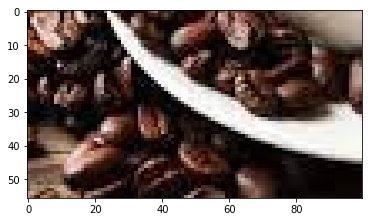

In [41]:
# We will calculate the region of interest 
# by slicing the pixels of the image
roi = img[103 : 400, 100 : 200]
cv_show(roi)

## Resizing the Image


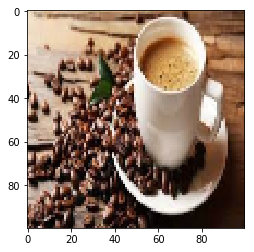

In [42]:
resized = cv.resize(img, (100, 100))
cv_show(resized)

## Resizing an image while prezerving the aspect ratio

$\frac{h_1}{w_1}=\frac{h_2}{w_2}$

if you have $w_2$ you can compute $h_2$ like this $h_2=w_2\frac{h_1}{w_1}$


ratio :  0.5
250
ratio 2 :  0.5
old dimentions (318, 159)
new dimentions (500, 250)


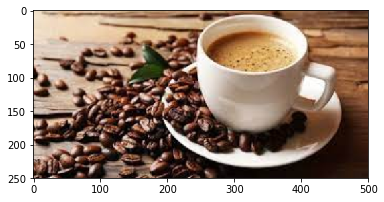

In [43]:
# Calculating the ratio
ratio =  h/w
print('ratio : ',ratio)

w2=500
h2=int(ratio*w2)
print(h2)
ratio2 = h2/w2

print('ratio 2 : ',ratio2)
 
# Creating a tuple containing width and height
dim = (w2, h2)

print('old dimentions',(w,h))
print('new dimentions',dim)
# Resizing the image
resize_aspect = cv.resize(img, dim)
cv_show(resize_aspect)

# Scaling
we can write a function that rescales an image by a factor


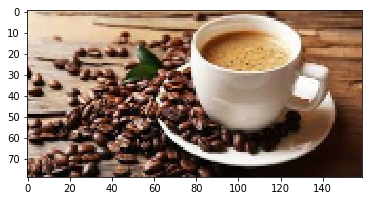

In [44]:
def scale_image(image,factor):
    w,h,_=image.shape
    new_dim=(int(h*factor),int(w*factor))
    return cv.resize(image,new_dim)

scale = 0.5

cv_show(scale_image(img,scale))

## Drawing a rectangle in an image 


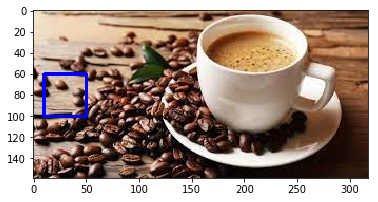

In [45]:
# We are copying the original image, 
# as it is an in-place operation.
img_copy = img.copy()
  
# Using the rectangle() function to create a rectangle.
rectangle = cv.rectangle(img_copy, (10, 60), 
                          (50, 100), (255, 0, 0), 2)

cv_show(img_copy)


## Creating a blanc grayscale image and drawing on it
to create an image we simply create a numpy array

Lets create a 300x300 grayscale image

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


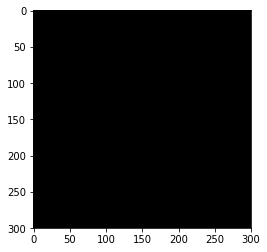

In [46]:

# np.zeros creates an array filled with zeros
blanc = np.zeros((300,300),dtype=np.uint8)
print(blanc)
cv_show(blanc)

we can use fill function to fill the matrix (image) with a value

[[111 111 111 ... 111 111 111]
 [111 111 111 ... 111 111 111]
 [111 111 111 ... 111 111 111]
 ...
 [111 111 111 ... 111 111 111]
 [111 111 111 ... 111 111 111]
 [111 111 111 ... 111 111 111]]


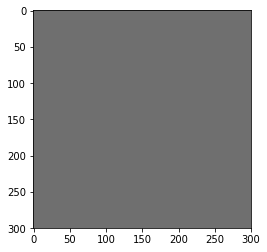

In [47]:
blanc.fill(111)
print(blanc)
cv_show(blanc)


## Draw a blue square on a gray scale image ..??

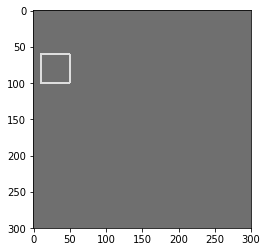

In [48]:
img_copy = blanc.copy()
  
# Using the rectangle() function to create a rectangle.
rectangle = cv.rectangle(img_copy, (10, 60), 
                          (50, 100), (222, 33, 22), 2)
cv_show(rectangle)


## Creating a blanc color image and drawing on it


[[[111 111 111]
  [111 111 111]
  [111 111 111]
  ...
  [111 111 111]
  [111 111 111]
  [111 111 111]]

 [[111 111 111]
  [111 111 111]
  [111 111 111]
  ...
  [111 111 111]
  [111 111 111]
  [111 111 111]]

 [[111 111 111]
  [111 111 111]
  [111 111 111]
  ...
  [111 111 111]
  [111 111 111]
  [111 111 111]]

 ...

 [[111 111 111]
  [111 111 111]
  [111 111 111]
  ...
  [111 111 111]
  [111 111 111]
  [111 111 111]]

 [[111 111 111]
  [111 111 111]
  [111 111 111]
  ...
  [111 111 111]
  [111 111 111]
  [111 111 111]]

 [[111 111 111]
  [111 111 111]
  [111 111 111]
  ...
  [111 111 111]
  [111 111 111]
  [111 111 111]]]


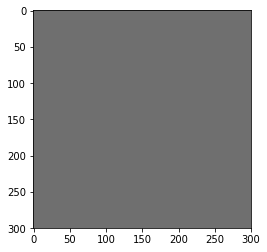

In [49]:
blanc = np.zeros((300,300,3),dtype=np.uint8)
blanc.fill(111)
print(blanc)
cv_show(blanc)


now lets draw a blue rectangle in our image

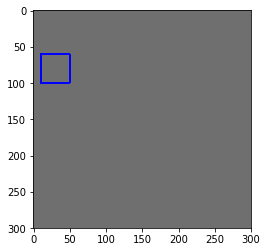

In [50]:
img_copy = blanc.copy()
  
# Using the rectangle() function to create a rectangle.
cv.rectangle(img_copy, (10, 60), 
                          (50, 100), (255, 0, 0), 2)
cv_show(img_copy)

# Changing pixel values with slicing
now lets change the color of the half of the image

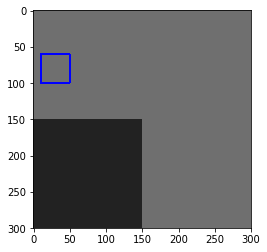

In [51]:
img_copy[150:,:150]=34
cv_show(img_copy)

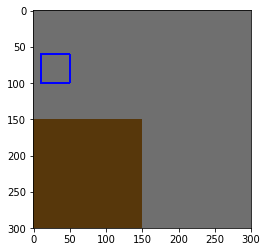

In [52]:
img_copy[150:,:150]=(11,55,87)
cv_show(img_copy)

## Working with color Planes


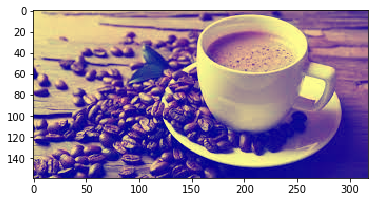

In [53]:
copy = img.copy()
#Chainging the Blue color compnent of the image
copy[:,:,0]=144
cv_show(copy)


# 2D Convolution ( Image Filtering )


## Averaging
This is done by convolving the image with a normalized box filter. It simply takes the average of all the pixels under kernel area and replaces the central element with this average. This is done by the function cv2.blur() or cv2.boxFilter(). Check the docs for more details about the kernel. We should specify the width and height of kernel. A 3x3 normalized box filter would look like this:
 
 
 ![](filter2.png"")


OpenCV provides a function, cv2.filter2D(), to convolve a kernel with an image.


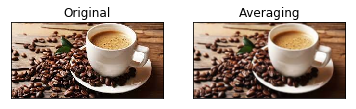

In [90]:

img = cv.imread('cofee.jpg')

kernel = np.ones((3,3),np.float32)/9
dst = cv.filter2D(img,-1,kernel)

plt.subplot(121),cv_show(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),cv_show(dst),plt.title('Averaging')
plt.xticks([]), plt.yticks([])
plt.show()

## Gaussian Filtering
To apply a gaussian filter we use a discrete approximation.


 ![](gkr.png"")



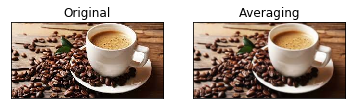

In [92]:



img = cv.imread('cofee.jpg')

kernel = np.array(([[1, 2, 1], [2, 4, 2], [1, 2, 1]]), np.float32)/16


dst = cv.filter2D(img,-1,kernel)

plt.subplot(121),cv_show(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),cv_show(dst),plt.title('Averaging')
plt.xticks([]), plt.yticks([])
plt.show()

